In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [2]:
ds=pd.read_csv("train.csv").head(2000).values

In [3]:
X=np.array(ds[:,1:])
Y=np.array(ds[:,0])
print(X.shape)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

(2000, 784)


5


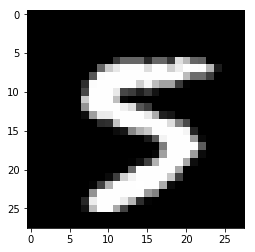

In [4]:
plt.imshow(X_test[12,:].reshape(28,28),cmap="gray")
print(Y_test[12])

In [5]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,X_test,k=5):
    vals=[]
    for i in range(X.shape[0]):
        vals.append((dist(X_test,X[i]),Y[i]))
    vals=sorted(vals)[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    return new_vals[0][index]

In [6]:
pred=[]
for i in range(X_test.shape[0]):
    pred.append(int(knn(X_train,Y_train,X_test[i])))


In [7]:
len(pred)

400

In [8]:
def accuracy(pred,Y_test):
    acc=0
    for i in range(len(pred)):
        if(pred[i]==Y_test[i]):
            acc+=1
    return acc/len(pred)
print(accuracy(pred,Y_test))

0.9075
